In [1]:
%matplotlib inline
import sys
sys.path.append("../")
import numpy
from matplotlib import pyplot
from rl_book_gym.envs.racetrack import Env, Action, Reward

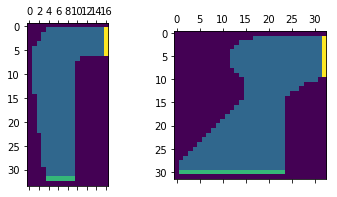

In [2]:
%matplotlib inline
import numpy
from matplotlib import pyplot
fig = pyplot.figure(figsize=(6,3))
ax = fig.add_subplot(1, 2, 1)
ax.matshow(numpy.loadtxt("../asset/map-ex5-11-1.csv", delimiter=","))
ax = fig.add_subplot(1, 2, 2)
ax.matshow(numpy.loadtxt("../asset/map-ex5-11-2.csv", delimiter=","))

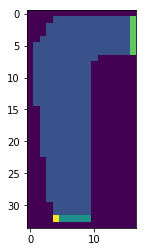

In [3]:
from IPython.display import display
env = Env("../asset/map-ex5-11-1.csv")
env.position = env.choice_start()
pyplot.imshow(env.render(mode="rgb_array"))

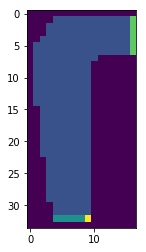

In [16]:
env.step([-1, 0])
pyplot.imshow(env.render(mode="rgb_array"))

In [5]:
env.position

array([31,  4])

In [6]:
env.velocity

array([-1,  0])

In [7]:
numpy.concatenate((env.position, env.velocity))

array([31,  4, -1,  0])